# Loading the Libraries

In [1]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets


np.random.seed(1)

# Loading the data

In [3]:
X_train = pd.read_csv("df_Caesarian_train_X.csv")
X_test = pd.read_csv("df_Caesarian_test_X.csv")
y_train = pd.read_csv("df_Caesarian_train_y.csv")
y_test = pd.read_csv("df_Caesarian_test_y.csv")

# MLP Classifier

In [4]:
%%time

model1 = MLPClassifier(
    hidden_layer_sizes=(60,50,40), 
    activation = 'relu',
    solver='adam',
    alpha=0.0001, # Strength of the L2 regularization term
    batch_size='auto',
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    max_iter=200,
    tol=0.00001, 
    early_stopping = True,
    n_iter_no_change = 5,
    verbose=True
    
)
_ = model1.fit(X_train, y_train)

# Currently (version 1.2.2), MLPClassifier supports only the Cross-Entropy loss function.
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Iteration 1, loss = 0.80892318
Validation score: 0.571429
Iteration 2, loss = 0.71547534
Validation score: 0.571429
Iteration 3, loss = 0.68053515
Validation score: 0.571429
Iteration 4, loss = 0.68916103
Validation score: 0.428571
Iteration 5, loss = 0.70597856
Validation score: 0.428571
Iteration 6, loss = 0.70739855
Validation score: 0.428571
Iteration 7, loss = 0.69662702
Validation score: 0.857143
Iteration 8, loss = 0.68295334
Validation score: 0.714286
Iteration 9, loss = 0.67470627
Validation score: 0.571429
Iteration 10, loss = 0.67466553
Validation score: 0.571429
Iteration 11, loss = 0.68045559
Validation score: 0.571429
Iteration 12, loss = 0.68554332
Validation score: 0.571429
Iteration 13, loss = 0.68537324
Validation score: 0.571429
Validation score did not improve more than tol=0.000010 for 5 consecutive epochs. Stopping.
CPU times: total: 46.9 ms
Wall time: 33.2 ms


In [5]:
model1.loss_curve_

[0.8089231783153429,
 0.7154753365217615,
 0.6805351519320854,
 0.6891610296302887,
 0.7059785559579884,
 0.7073985454586523,
 0.6966270170038943,
 0.6829533407425885,
 0.6747062702972568,
 0.6746655279531165,
 0.6804555897840042,
 0.6855433199248016,
 0.685373235641399]

In [6]:
%%time
y_pred = model1.predict(X_test)

CPU times: total: 0 ns
Wall time: 2.99 ms


In [7]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7222    0.7647    0.7429        17
           1     0.6000    0.5455    0.5714        11

    accuracy                         0.6786        28
   macro avg     0.6611    0.6551    0.6571        28
weighted avg     0.6742    0.6786    0.6755        28



In [8]:
y_pred = model1.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0], dtype=int64)

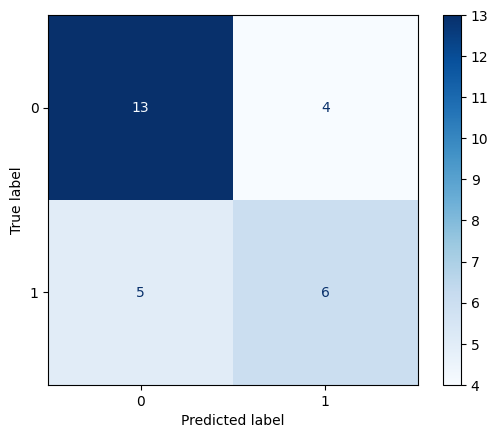

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Random Search CV

In [10]:
%%time

param_distributions = {
    'hidden_layer_sizes': [ (90,), (80,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

random_search = RandomizedSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_distributions=param_distributions, 
    cv=3, 
    n_iter=300,
    scoring='f1_macro', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = random_search.fit(X_train, y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits
CPU times: total: 3.14 s
Wall time: 1min 16s


In [11]:
model2 = random_search.best_estimator_

print(random_search.best_params_)

{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (70, 50, 40), 'alpha': 0.5, 'activation': 'tanh'}


In [12]:
%%time
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.5294    0.6923        17
           1     0.5789    1.0000    0.7333        11

    accuracy                         0.7143        28
   macro avg     0.7895    0.7647    0.7128        28
weighted avg     0.8346    0.7143    0.7084        28

CPU times: total: 31.2 ms
Wall time: 34.9 ms


In [13]:
y_pred = model2.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1], dtype=int64)

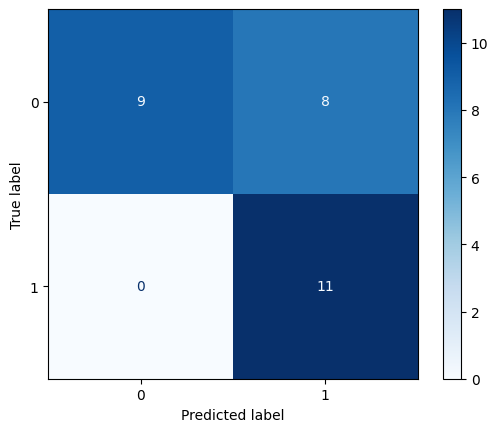

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Keras Model

# Wide network

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
model_wide = keras.models.Sequential()
model_wide.add(keras.layers.Input(7))
model_wide.add(keras.layers.Dense(280, activation="relu"))
model_wide.add(keras.layers.Dense(1, activation="sigmoid"))

In [16]:
model_wide.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 280)               2240      
                                                                 
 dense_1 (Dense)             (None, 1)                 281       
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_wide.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
history = model_wide.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 413ms/step - loss: 0.7598 - accuracy: 0.3438 - val_loss: 0.6694 - val_accuracy: 0.6071
Epoch 2/100
2/2 [==============================] - 0s 48ms/step - loss: 0.7011 - accuracy: 0.4844 - val_loss: 0.7487 - val_accuracy: 0.3929
Epoch 3/100
2/2 [==============================] - 0s 57ms/step - loss: 0.6893 - accuracy: 0.5469 - val_loss: 0.8073 - val_accuracy: 0.3929
Epoch 4/100
2/2 [==============================] - 0s 54ms/step - loss: 0.7028 - accuracy: 0.5469 - val_loss: 0.7780 - val_accuracy: 0.3929
Epoch 5/100
2/2 [==============================] - 0s 53ms/step - loss: 0.6884 - accuracy: 0.5469 - val_loss: 0.7083 - val_accuracy: 0.3929
Epoch 6/100
2/2 [==============================] - 0s 48ms/step - loss: 0.6721 - accuracy: 0.5469 - val_loss: 0.6651 - val_accuracy: 0.7857
Epoch 7/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6705 - accuracy: 0.6250 - val_loss: 0.6547 - val_accuracy: 0.8214
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 46ms/step - loss: 0.5881 - accuracy: 0.6719 - val_loss: 0.5583 - val_accuracy: 0.7857
Epoch 60/100
2/2 [==============================] - 0s 51ms/step - loss: 0.5884 - accuracy: 0.6719 - val_loss: 0.5595 - val_accuracy: 0.7857
Epoch 61/100
2/2 [==============================] - 0s 47ms/step - loss: 0.5897 - accuracy: 0.6719 - val_loss: 0.5587 - val_accuracy: 0.7857
Epoch 62/100
2/2 [==============================] - 0s 50ms/step - loss: 0.5965 - accuracy: 0.6406 - val_loss: 0.5534 - val_accuracy: 0.7857
Epoch 63/100
2/2 [==============================] - 0s 48ms/step - loss: 0.5856 - accuracy: 0.6562 - val_loss: 0.5771 - val_accuracy: 0.7143
Epoch 64/100
2/2 [==============================] - 0s 49ms/step - loss: 0.5872 - accuracy: 0.6562 - val_loss: 0.5903 - val_accuracy: 0.6071
Epoch 65/100
2/2 [==============================] - 0s 45ms/step - loss: 0.5872 - accuracy: 0.6562 - val_loss: 0.5789 - val_accuracy: 0.6786
Epoch 66/100
2/2 [========

In [19]:
loss, accuracy = model_wide.evaluate(X_test, y_test)

1/1 [==============================] - 0s 54ms/step - loss: 0.5477 - accuracy: 0.7857


In [20]:
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

Loss 0.54770
Accuracy 0.7857


In [21]:
model_wide.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 280)               2240      
                                                                 
 dense_1 (Dense)             (None, 1)                 281       
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [22]:
import collections

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

[('Caesarian_Yes', 1)]


1/1 [==============================] - 0s 173ms/step


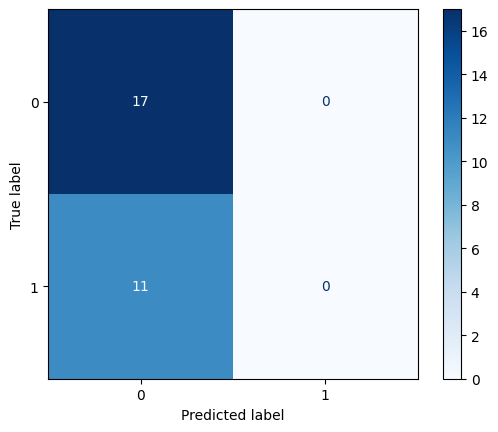

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6071    1.0000    0.7556        17
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.6071        28
   macro avg     0.3036    0.5000    0.3778        28
weighted avg     0.3686    0.6071    0.4587        28



# Deep Network

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
model_deep = keras.models.Sequential()
model_deep.add(keras.layers.Input(7))
model_deep.add(keras.layers.Dense(280, activation="relu"))
model_deep.add(keras.layers.Dense(280, activation="relu"))
model_deep.add(keras.layers.Dense(280, activation="relu"))
model_deep.add(keras.layers.Dense(1, activation="sigmoid"))

In [27]:
model_deep.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
history = model_deep.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
2/2 [==============================] - 1s 300ms/step - loss: 0.8035 - accuracy: 0.5469 - val_loss: 0.6760 - val_accuracy: 0.6071
Epoch 2/100
2/2 [==============================] - 0s 53ms/step - loss: 0.7420 - accuracy: 0.4531 - val_loss: 0.6781 - val_accuracy: 0.7500
Epoch 3/100
2/2 [==============================] - 0s 49ms/step - loss: 0.6750 - accuracy: 0.6875 - val_loss: 0.7913 - val_accuracy: 0.3929
Epoch 4/100
2/2 [==============================] - 0s 49ms/step - loss: 0.7108 - accuracy: 0.5469 - val_loss: 0.7147 - val_accuracy: 0.3929
Epoch 5/100
2/2 [==============================] - 0s 51ms/step - loss: 0.6881 - accuracy: 0.4844 - val_loss: 0.6545 - val_accuracy: 0.6071
Epoch 6/100
2/2 [==============================] - 0s 52ms/step - loss: 0.6980 - accuracy: 0.4688 - val_loss: 0.7298 - val_accuracy: 0.3929
Epoch 7/100
2/2 [==============================] - 0s 49ms/step - loss: 0.6809 - accuracy: 0.5469 - val_loss: 0.7701 - val_accuracy: 0.3929
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 47ms/step - loss: 0.6128 - accuracy: 0.6562 - val_loss: 0.5152 - val_accuracy: 0.7857
Epoch 60/100
2/2 [==============================] - 0s 51ms/step - loss: 0.6343 - accuracy: 0.6875 - val_loss: 0.4888 - val_accuracy: 0.7500
Epoch 61/100
2/2 [==============================] - 0s 48ms/step - loss: 0.5983 - accuracy: 0.6719 - val_loss: 0.6253 - val_accuracy: 0.5714
Epoch 62/100
2/2 [==============================] - 0s 48ms/step - loss: 0.6192 - accuracy: 0.6406 - val_loss: 0.7611 - val_accuracy: 0.5000
Epoch 63/100
2/2 [==============================] - 0s 50ms/step - loss: 0.6194 - accuracy: 0.6250 - val_loss: 0.5155 - val_accuracy: 0.7857
Epoch 64/100
2/2 [==============================] - 0s 50ms/step - loss: 0.5949 - accuracy: 0.7344 - val_loss: 0.5005 - val_accuracy: 0.7857
Epoch 65/100
2/2 [==============================] - 0s 50ms/step - loss: 0.5946 - accuracy: 0.6562 - val_loss: 0.5950 - val_accuracy: 0.6786
Epoch 66/100
2/2 [========

In [29]:
loss, accuracy = model_wide.evaluate(X_test, y_test)

1/1 [==============================] - 0s 43ms/step - loss: 0.5477 - accuracy: 0.7857


In [30]:
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

Loss 0.54770
Accuracy 0.7857


In [31]:
model_wide.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 280)               2240      
                                                                 
 dense_1 (Dense)             (None, 1)                 281       
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [32]:
import collections

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

[('Caesarian_Yes', 1)]


1/1 [==============================] - 0s 39ms/step


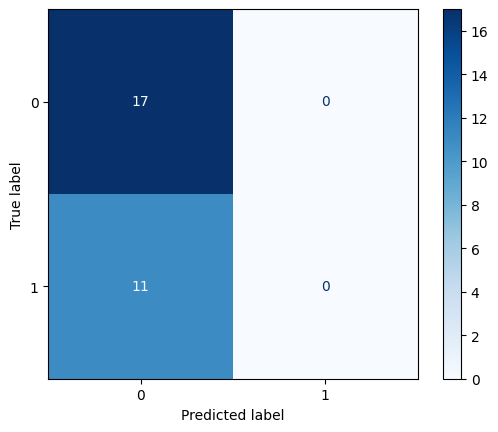

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6071    1.0000    0.7556        17
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.6071        28
   macro avg     0.3036    0.5000    0.3778        28
weighted avg     0.3686    0.6071    0.4587        28



# Combination of the Wide and Deep Network

In [35]:
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
input_ = keras.layers.Input(7)
hidden1 = keras.layers.Dense(150, activation="relu")(input_)
hidden2 = keras.layers.Dense(150, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(150, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(150, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_wide_deep = keras.Model(inputs=[input_], outputs=[output])

In [37]:
model_wide_deep.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
history = model_wide_deep.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 301ms/step - loss: 1.5989 - accuracy: 0.5469 - val_loss: 0.9817 - val_accuracy: 0.3929
Epoch 2/100
2/2 [==============================] - 0s 49ms/step - loss: 0.7795 - accuracy: 0.4844 - val_loss: 0.7472 - val_accuracy: 0.6071
Epoch 3/100
2/2 [==============================] - 0s 48ms/step - loss: 0.8724 - accuracy: 0.4531 - val_loss: 0.6948 - val_accuracy: 0.6071
Epoch 4/100
2/2 [==============================] - 0s 56ms/step - loss: 0.7542 - accuracy: 0.4688 - val_loss: 0.7353 - val_accuracy: 0.4286
Epoch 5/100
2/2 [==============================] - 0s 49ms/step - loss: 0.7107 - accuracy: 0.5469 - val_loss: 0.9156 - val_accuracy: 0.3929
Epoch 6/100
2/2 [==============================] - 0s 52ms/step - loss: 0.7650 - accuracy: 0.5469 - val_loss: 0.8862 - val_accuracy: 0.3929
Epoch 7/100
2/2 [==============================] - 0s 52ms/step - loss: 0.7328 - accuracy: 0.5469 - val_loss: 0.7300 - val_accuracy: 0.3929
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 43ms/step - loss: 0.6021 - accuracy: 0.6406 - val_loss: 0.5647 - val_accuracy: 0.7857
Epoch 60/100
2/2 [==============================] - 0s 47ms/step - loss: 0.5929 - accuracy: 0.6406 - val_loss: 0.5981 - val_accuracy: 0.6071
Epoch 61/100
2/2 [==============================] - 0s 48ms/step - loss: 0.5977 - accuracy: 0.6562 - val_loss: 0.6027 - val_accuracy: 0.6071
Epoch 62/100
2/2 [==============================] - 0s 48ms/step - loss: 0.5920 - accuracy: 0.6406 - val_loss: 0.5516 - val_accuracy: 0.7857
Epoch 63/100
2/2 [==============================] - 0s 48ms/step - loss: 0.6042 - accuracy: 0.6562 - val_loss: 0.5229 - val_accuracy: 0.7857
Epoch 64/100
2/2 [==============================] - 0s 47ms/step - loss: 0.5938 - accuracy: 0.6250 - val_loss: 0.5850 - val_accuracy: 0.6786
Epoch 65/100
2/2 [==============================] - 0s 48ms/step - loss: 0.6068 - accuracy: 0.6406 - val_loss: 0.6306 - val_accuracy: 0.6071
Epoch 66/100
2/2 [========

In [39]:
loss, accuracy = model_wide_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

1/1 [==============================] - 0s 43ms/step - loss: 0.5902 - accuracy: 0.7500
Loss 0.59021
Accuracy 0.7500


In [40]:
model_wide_deep.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 150)          1200        ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 150)          22650       ['dense_6[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 150)          22650       ['dense_7[0][0]']                
                                                                                              

1/1 [==============================] - 0s 83ms/step


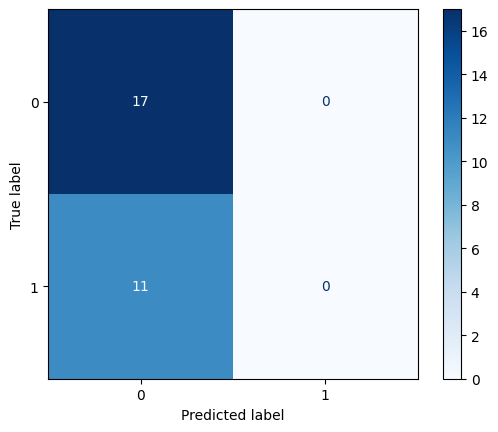

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6071    1.0000    0.7556        17
           1     0.0000    0.0000    0.0000        11

    accuracy                         0.6071        28
   macro avg     0.3036    0.5000    0.3778        28
weighted avg     0.3686    0.6071    0.4587        28



# Hyperparameter Tuning with SK learn

# Random Grid search

In [43]:
%%time

def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    #though you could return a compiled model, it's not necessary, and would result in the loss of these
    # parameters in the tune process - as they would be 'hard coded'
    # model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

    return model


CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=6,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()


CPU times: total: 15.6 ms
Wall time: 25.8 ms


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 6,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [45]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['binary_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 6,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [46]:
%%time

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='f1_macro',  # we could use any appropriate sklearn metric here (i.e. accuracy, f1_micro, f1_macro)
    n_iter=50, 
    cv=5)

# In rare cases, you may find your model training results in exceeding python's default recursion limit.
# If needed, you can increase this excersion limit by using the following code.
#import sys
#sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

_ = rnd_search_cv.fit(X_train, y_train,  verbose=1)

# You can create 'call back' functions. These are functions that will be called at the 
# end of each epoch. There are a number of builtin functions created for this purpose, 
# one of which is EarlyStopping -- that, based on the parameters you give, will stop
# the training process. This is useful when the algorithm is not making any significant
# gains through further training. 
#earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#callback = [earlystop]
#_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


Epoch 1/10
1/1 [==============================] - 0s 411ms/step - loss: 0.7696
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7644
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7596
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7550
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7507
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7466
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7428
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7391
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7357
Epoch 10/10
1/1 [==============================] - 0s 117ms/step
Epoch 1/10
1/1 [==============================] - 0s 406ms/step - loss: 1.0770
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 1.0554
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 1.0346
Epoch 4

3/3 [==============================] - 0s 3ms/step - loss: 0.8141
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7925
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7740
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7542
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7383
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7250
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7099
Epoch 10/10
1/1 [==============================] - 0s 103ms/step
Epoch 1/10
3/3 [==============================] - 1s 2ms/step - loss: 2.0572
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0099
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 1.9577
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 1.9102
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 1.8591
Epoch 6/10
3/3 [======

3/3 [==============================] - 0s 2ms/step - loss: 0.7804
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.9606
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7237
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8925
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8857
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.9428
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8558
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8209
Epoch 10/10
1/1 [==============================] - 0s 103ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.6793
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.3009
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0976
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 1.7659
Epoch 5/10
3/3 [======

1/1 [==============================] - 0s 404ms/step - loss: 2.4309
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 2.1508
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 1.6946
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.4884
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 1.2753
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 1.2918
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 1.1026
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0218
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 1.0636
Epoch 10/10
1/1 [==============================] - 0s 104ms/step
Epoch 1/10
1/1 [==============================] - 0s 389ms/step - loss: 0.9546
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 1.0357
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7509
Epoch 4/10
1/1 [==

1/1 [==============================] - 0s 101ms/step
Epoch 1/10
3/3 [==============================] - 1s 3ms/step - loss: 0.8101
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.9016
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 1.2504
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 1.4041
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 1.3349
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.9245
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0556
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.9821
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 1.1348
Epoch 10/10
1/1 [==============================] - 0s 97ms/step
Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 1.8740
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8212
Epoch 3/10
3/3 [====================

1/1 [==============================] - 0s 103ms/step
Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8066
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8502
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8080
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 0.5993
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7167
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6731
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6461
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6147
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6261
Epoch 10/10
1/1 [==============================] - 0s 102ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 1.1548
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 1.6607
Epoch 3/10
3/3 [===================

1/1 [==============================] - 0s 5ms/step - loss: 0.7339
Epoch 10/10
1/1 [==============================] - 0s 105ms/step
Epoch 1/10
1/1 [==============================] - 1s 526ms/step - loss: 0.8612
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7956
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7512
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7231
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7061
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6963
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6907
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6875
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6857
Epoch 10/10
1/1 [==============================] - 0s 102ms/step
Epoch 1/10
1/1 [==============================] - 0s 357ms/step - loss: 1.2701
Epoch 2/10
1/1 [==============

3/3 [==============================] - 0s 3ms/step - loss: 2.4223
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 2.2468
Epoch 10/10
1/1 [==============================] - 0s 94ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 1.4924
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 1.7272
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 1.2148
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 1.3602
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 1.1232
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 1.3900
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 1.1463
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 1.0175
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 1.3020
Epoch 10/10
1/1 [==============================] - 0s 101ms/step
Epoch 1/10
3/3 [===================

1/1 [==============================] - 0s 5ms/step - loss: 0.8962
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9707
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.9096
Epoch 10/10
1/1 [==============================] - 0s 113ms/step
Epoch 1/10
1/1 [==============================] - 0s 444ms/step - loss: 0.7737
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8126
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8154
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8546
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8120
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8005
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7335
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7140
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7213
Epoch 10/10
1/1 [===

1/1 [==============================] - 0s 5ms/step - loss: 0.8117
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9629
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 1.0102
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0422
Epoch 10/10
1/1 [==============================] - 0s 101ms/step
Epoch 1/10
1/1 [==============================] - 0s 398ms/step - loss: 1.2706
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 1.4324
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 1.8940
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3154
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 1.5086
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 1.4958
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 1.4835
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3305
Epoch 9/10
1/1 [====

3/3 [==============================] - 0s 3ms/step - loss: 1.2071
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 1.1698
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.9662
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 1.1960
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 1.2808
Epoch 10/10
1/1 [==============================] - 0s 101ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 1.9731
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 1.7674
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0202
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 1.7655
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 1.7404
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 1.6881
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 1.5067
Epoch 8/10
3/3 [======

1/1 [==============================] - 0s 5ms/step - loss: 0.9842
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7093
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7180
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8718
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8310
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6862
Epoch 10/10
1/1 [==============================] - 0s 98ms/step
Epoch 1/10
1/1 [==============================] - 0s 439ms/step - loss: 2.1982
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9447
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8489
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 1.2203
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 1.2613
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0718
Epoch 7/10
1/1 [=====

3/3 [==============================] - 0s 3ms/step - loss: 3.4601
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 3.4199
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 3.3845
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 3.3445
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 3.3090
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 3.2706
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 3.2318
Epoch 10/10
1/1 [==============================] - 0s 103ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.2380
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1924
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 2.1488
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1046
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 2.0630
Epoch 6/10
3/3 [======

3/3 [==============================] - 0s 3ms/step - loss: 1.4482
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 1.1208
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 1.0876
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8945
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8673
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7404
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8139
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7103
Epoch 10/10
1/1 [==============================] - 0s 116ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.1728
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 1.6628
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.9557
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 1.0692
Epoch 5/10
3/3 [======

1/1 [==============================] - 0s 462ms/step - loss: 3.1846
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.8243
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 2.8121
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 2.3905
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 2.1939
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 2.0211
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 2.0664
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 1.7763
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1.6280
Epoch 10/10
1/1 [==============================] - 0s 103ms/step
Epoch 1/10
1/1 [==============================] - 0s 457ms/step - loss: 1.4613
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 1.4919
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 1.2663
Epoch 4/10
1/1 [==

1/1 [==============================] - 0s 120ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6937
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0318
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7381
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 1.2789
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 1.2859
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 1.1402
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0754
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8245
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.9475
Epoch 10/10
1/1 [==============================] - 0s 121ms/step
Epoch 1/10
3/3 [==============================] - 1s 2ms/step - loss: 1.2246
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 1.1549
Epoch 3/10
3/3 [===================

1/1 [==============================] - 0s 104ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 0.9925
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8795
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8684
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0765
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 1.0828
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 1.0296
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.9166
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0357
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.9665
Epoch 10/10
1/1 [==============================] - 0s 95ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 2.0207
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 1.9405
Epoch 3/10
3/3 [====================

3/3 [==============================] - 0s 2ms/step - loss: 1.0101
Epoch 10/10
1/1 [==============================] - 0s 103ms/step
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 1.0525
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8140
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.9413
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7852
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.9985
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8935
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8219
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8754
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.9155
Epoch 10/10
1/1 [==============================] - 0s 101ms/step
Epoch 1/10
3/3 [==============================] - 1s 3ms/step - loss: 2.4539
Epoch 2/10
3/3 [==================

1/1 [==============================] - 0s 5ms/step - loss: 1.0064
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.9826
Epoch 10/10
1/1 [==============================] - 0s 115ms/step
Epoch 1/10
1/1 [==============================] - 1s 521ms/step - loss: 0.7689
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 1.2310
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 1.2966
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.0280
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9598
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8302
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.9001
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8819
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6877
Epoch 10/10
1/1 [==============================] - 0s 115ms/step
Epoch 1/10
1/1 [================

1/1 [==============================] - 0s 5ms/step - loss: 1.0106
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7303
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 1.1917
Epoch 10/10
1/1 [==============================] - 0s 94ms/step
Epoch 1/10
1/1 [==============================] - 0s 442ms/step - loss: 4.4626
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 4.4083
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 3.9786
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 4.0805
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 3.9161
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 3.3924
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 3.0907
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 3.1044
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 3.0345
Epoch 10/10
1/1 [====

1/1 [==============================] - 0s 5ms/step - loss: 2.0241
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 1.9038
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 2.2582
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 2.1498
Epoch 10/10
1/1 [==============================] - 0s 97ms/step
Epoch 1/10
1/1 [==============================] - 0s 391ms/step - loss: 1.1865
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3385
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 1.4343
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.4648
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 1.4034
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 1.2882
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 1.2660
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 1.1613
Epoch 9/10
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.8711
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8411
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9985
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8397
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8681
Epoch 10/10
1/1 [==============================] - 0s 97ms/step
Epoch 1/10
1/1 [==============================] - 0s 406ms/step - loss: 1.2590
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 1.1686
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.9448
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8018
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8625
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 1.0261
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7531
Epoch 8/10
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.9303
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7163
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7656
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8710
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8045
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6865
Epoch 10/10
1/1 [==============================] - 0s 102ms/step
Epoch 1/10
1/1 [==============================] - 0s 417ms/step - loss: 5.4367
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 3.2055
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 1.1502
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0720
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 1.8896
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 2.1747
Epoch 7/10
1/1 [====

3/3 [==============================] - 0s 3ms/step - loss: 0.8899
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8533
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8233
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7985
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7806
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7602
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7452
Epoch 10/10
1/1 [==============================] - 0s 58ms/step
Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8653
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8462
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8273
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8104
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.7970
Epoch 6/10
3/3 [=======

1/1 [==============================] - 0s 5ms/step - loss: 1.4506
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3847
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 1.4609
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 1.4133
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3457
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 1.5102
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 1.2205
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 1.6412
Epoch 10/10
1/1 [==============================] - 0s 103ms/step
Epoch 1/10
1/1 [==============================] - 0s 448ms/step - loss: 4.1503
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 4.1348
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 3.9637
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 3.7972
Epoch 5/10
1/1 [====

1/1 [==============================] - 0s 395ms/step - loss: 1.9688
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 1.9416
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 1.9146
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.8877
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 1.8611
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 1.8346
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 1.8083
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 1.7823
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1.7565
Epoch 10/10
1/1 [==============================] - 0s 101ms/step
Epoch 1/10
1/1 [==============================] - 0s 369ms/step - loss: 2.2983
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 2.2706
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 2.2429
Epoch 4/10
1/1 [==

In [47]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.01,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (70,),
 'model__dropout': 0,
 'loss': 'binary_crossentropy',
 'epochs': 10,
 'batch_size': 20}

In [48]:
best_model = rnd_search_cv.best_estimator_

In [49]:
%%time

print(f"best score {best_model.score(X_test, y_test)}")
print(f"min loss {min(best_model.history_['loss'])}")

2/2 [==============================] - 0s 4ms/step
best score 0.7857142857142857
min loss 0.6224237084388733
CPU times: total: 547 ms
Wall time: 205 ms


In [50]:
best_model.history_

defaultdict(list,
            {'loss': [1.5007331371307373,
              0.8438791036605835,
              0.7087698578834534,
              0.7078964114189148,
              0.6817496418952942,
              0.6407492160797119,
              0.6521921157836914,
              0.6226102709770203,
              0.6224237084388733,
              0.6286393404006958]})

2/2 [==============================] - 0s 4ms/step


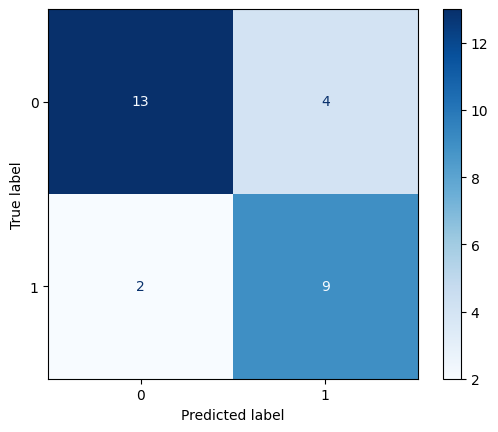

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test), digits=4))

2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0     0.8667    0.7647    0.8125        17
           1     0.6923    0.8182    0.7500        11

    accuracy                         0.7857        28
   macro avg     0.7795    0.7914    0.7812        28
weighted avg     0.7982    0.7857    0.7879        28



# Inference 

# MLP Classifier  f1 score before hyperparameter tuning is 0.7429
# MLP Classifier f1 score hyperparameter tuning is 0.7333        
# For Keras wide, deep and wide and deep network the f1 score is 0.7556 and for one the class I'm getting 0 which means it is not properly fitting for the data
# After the hyperparameter tuning I got the F1 score as 0.8125

# From my previous model my best model is SVM RBF kernel which is 73.33%

#  So keras model with SK learn tuning is performing well so I will consdier this model as best for my dataset
